# Bayesian Methods for Hackers - Chapter 1

This notebook looks at Bayesian symbols and definitions and an advanced script for modeling coin flips with a fair coin

Our references:

* [Bayesian Methods for Hackers, by Cam Davidson Pilon](https://dataorigami.net/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)

* [Bayesian Methods for Hackers - Github](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

* [Google Colab](https://colab.research.google.com/)

* [ArviZ: Version 0.17.0](https://python.arviz.org/en/stable/)

* [IPython: Version 4.0](https://ipython.org/)

* [Matplotlib: Version 3.8](https://matplotlib.org/)

* [Numpy Version: 1.26](https://numpy.org/)

* [Pandas Version: 2.2.0](https://pandas.pydata.org/)

* [Python Version 3.12.1](https://www.python.org/)



Bayesian inference is updating our beliefs after considering new evidence


Bayes' Theorem Variables

* P(A|X), the probability of A given the evidence X, an updated belief, aka the posterior probability

* P(X|A), the probability of X given the evidence A

* P(A) our belief about the probability of event A

* P(X) our belief about the proability of event X

Bayes' Theorem Equation

$$P(A|X) = \frac{P(X|A)P(A)}{P(X)}$$

This script looks at a coin flip scenario and plots a sequence of updating posterior probabilities as we observe increasing amounts of data

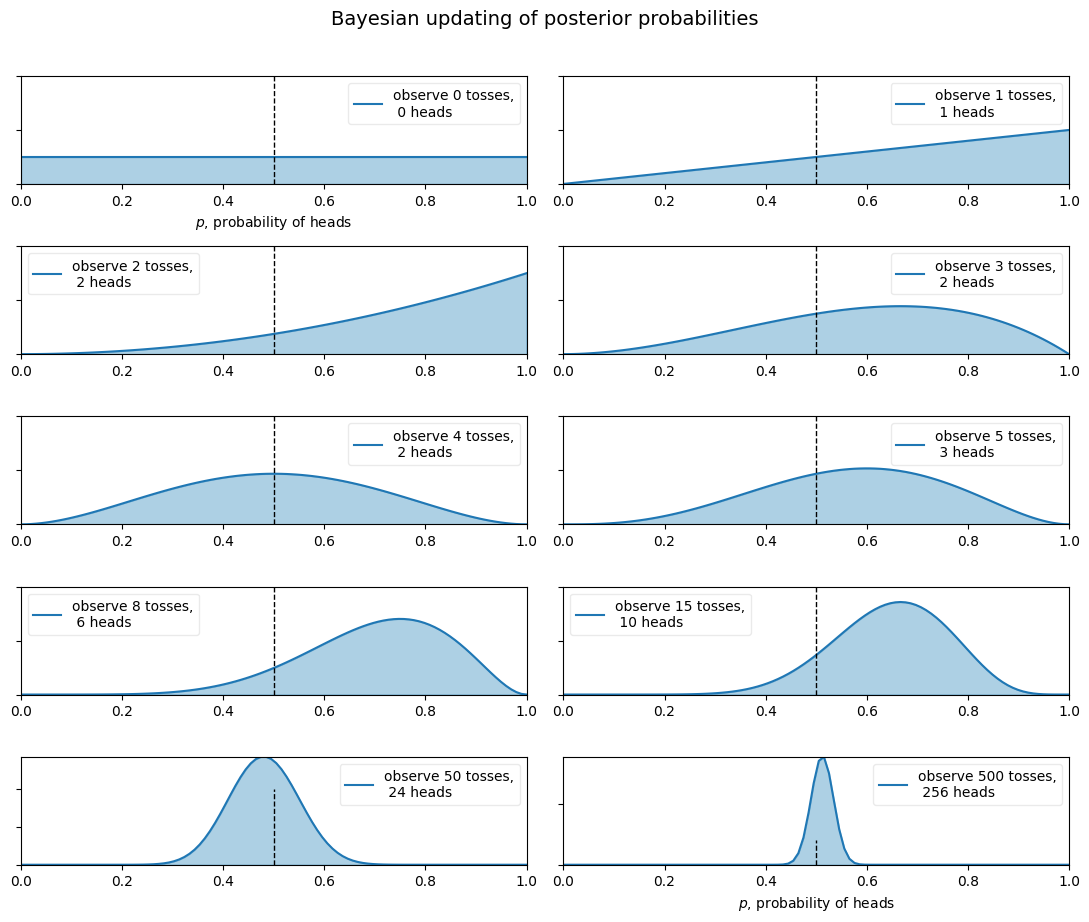

In [ ]:
"""
The book uses a custom matplotlibrc file, which provides the unique styles for
matplotlib plots. If executing this book, and you wish to use the book's
styling, provided are two options:
    1. Overwrite your own matplotlibrc file with the rc-file provided in the
       book's styles/ dir. See http://matplotlib.org/users/customizing.html
    2. Also in the styles is  bmh_matplotlibrc.json file. This can be used to
       update the styles in only this notebook. Try running the following code:

        import json
        s = json.load(open("../styles/bmh_matplotlibrc.json"))
        matplotlib.rcParams.update(s)

"""

# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data (coin-flips), our probabilities will tighten closer and closer around the true value of p=0.5 (marked by a dashed line).